In [2]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras import models
from PIL import Image
import json

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# sample folder
import cv2
import json
import random
import shutil
import os

path = "..\\z20_data\\food_sample"

food_sample_folder = os.listdir(path)

image_folders = []
json_folders = []

all_images = []
new_jsons = []

for i, folder_name in enumerate(food_sample_folder):
    image_folders.append(folder_name)
    image = os.listdir(path+'/'+folder_name) 
    folder_path = os.path.join(path,folder_name)

    for j, file_name in enumerate(image): 
        file = os.path.join(folder_path,file_name)
        all_images.append(file)

print(all_images)
print(image_folders)

['..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00865.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00866.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00867.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00868.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00869.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00870.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00871.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00872.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00873.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00874.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00875.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00876.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00877.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00878.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00879.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00880.jpg', '..\\z20_data\\food_sample\\blt샌드위치\\B020401XX_00881.jp

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    zoom_range = 0.2,
    shear_range = 30,
    horizontal_flip = True,
    featurewise_center=True,
    validation_split=0.2

    )

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(256,256),
    class_mode='sparse',
    batch_size = 32,
    shuffle = False,
    subset = 'training'
    
    )  

validation_generator = train_datagen.flow_from_directory(
    path,
    target_size=(256,256),
    class_mode='sparse',
    batch_size = 32,
    shuffle = False,
    subset = 'validation'

)

print(train_generator.class_indices)

Found 61600 images belonging to 30 classes.
Found 15386 images belonging to 30 classes.
{'blt샌드위치': 0, '갈비탕': 1, '과일채소샐러드': 2, '달걀찜': 3, '닭갈비': 4, '된장찌개': 5, '떡볶이': 6, '메쉬드포테이토': 7, '모듬초밥': 8, '배추김치': 9, '베이글샌드위치': 10, '보쌈': 11, '복숭아': 12, '볶음면': 13, '볶음밥': 14, '부침개': 15, '비빔밥': 16, '빵': 17, '쇠고기구이': 18, '순대': 19, '순두부찌개': 20, '스파게티': 21, '쌀국수': 22, '아이스라떼': 23, '어묵탕': 24, '짜장면': 25, '짬뽕': 26, '콩나물': 27, '후라이드치킨': 28, '훈제오리': 29}


In [6]:
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

IMAGE_SIZE = [256,256]

train_samples = 61600
validation_samples = 15386

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(56, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)  
checkpointer = ModelCheckpoint(filepath='inceptionV3.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_inceptionV3.log')
history = model.fit(
    train_generator,
    batch_size=16,
    epochs=20,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

Epoch 1/20
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:33:03 3s/step - accuracy: 0.3297 - loss: 2.5828
Epoch 1: val_loss improved from inf to 1.43657, saving model to inceptionV3.keras
3850/3850 ━━━━━━━━━━━━━━━━━━━━ 7009s 2s/step - accuracy: 0.3869 - loss: 2.3089 - val_accuracy: 0.5957 - val_loss: 1.4366
Epoch 2/20
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:31:45 3s/step - accuracy: 0.5876 - loss: 1.4122
Epoch 2: val_loss improved from 1.43657 to 1.08302, saving model to inceptionV3.keras
3850/3850 ━━━━━━━━━━━━━━━━━━━━ 6874s 2s/step - accuracy: 0.5978 - loss: 1.3741 - val_accuracy: 0.6923 - val_loss: 1.0830
Epoch 3/20
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:32:11 3s/step - accuracy: 0.6466 - loss: 1.1725
Epoch 3: val_loss improved from 1.08302 to 0.94372, saving model to inceptionV3.keras
3850/3850 ━━━━━━━━━━━━━━━━━━━━ 6905s 2s/step - accuracy: 0.6500 - loss: 1.1752 - val_accuracy: 0.7266 - val_loss: 0.9437
Epoch 4/20
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:30:31 3s/step - accuracy: 0.6742 - loss: 1.0962
Epoch 4: val_lo

In [8]:
model.save('Model_InceptionV3.h5')

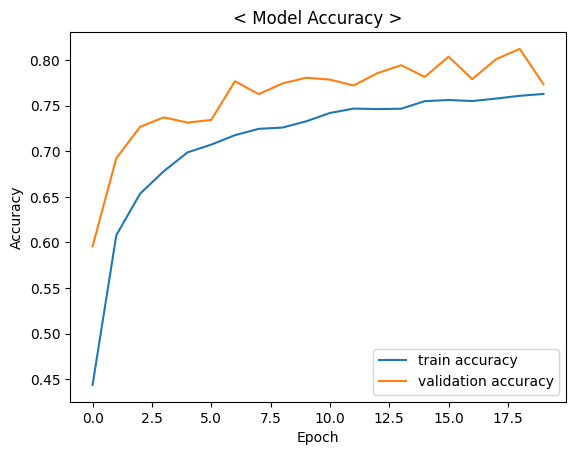

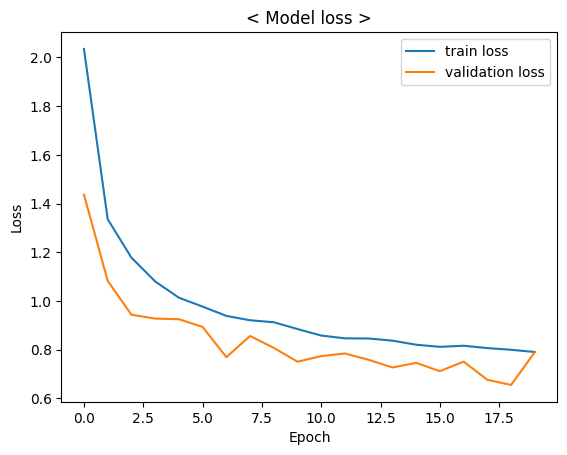

In [9]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('< Model Accuracy >')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_InceptionV3')
    plt.show()
    
def plot_loss(history):
    plt.plot(history.history['loss'], label="train loss")
    plt.plot(history.history['val_loss'], label="validation loss")
    plt.title('< Model loss >')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_InceptionV3')
    plt.show()

  
plot_accuracy(history)
plot_loss(history)

In [10]:
from tensorflow.keras.optimizers import SGD

IMAGE_SIZE = [256,256]

train_samples = 61600
validation_samples = 15386

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers[:-10]:
    layer.trainable = False

x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(56, activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy']
)  
checkpointer = ModelCheckpoint(filepath='inceptionV3_sgd.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_inceptionV3_sgd.log')
history_v3_sgd = model.fit(
    train_generator,
    batch_size=16,
    epochs=10,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

Epoch 1/10
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:40:11 3s/step - accuracy: 0.2502 - loss: 3.0205
Epoch 1: val_loss improved from inf to 2.56965, saving model to inceptionV3_sgd.keras
3850/3850 ━━━━━━━━━━━━━━━━━━━━ 7519s 2s/step - accuracy: 0.2713 - loss: 2.8415 - val_accuracy: 0.2658 - val_loss: 2.5697
Epoch 2/10
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:39:41 3s/step - accuracy: 0.2826 - loss: 2.4511
Epoch 2: val_loss did not improve from 2.56965
3850/3850 ━━━━━━━━━━━━━━━━━━━━ 7522s 2s/step - accuracy: 0.2963 - loss: 2.4126 - val_accuracy: 0.2591 - val_loss: 2.6004
Epoch 3/10
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:44:10 3s/step - accuracy: 0.2522 - loss: 2.5520
Epoch 3: val_loss improved from 2.56965 to 2.34213, saving model to inceptionV3_sgd.keras
3850/3850 ━━━━━━━━━━━━━━━━━━━━ 7774s 2s/step - accuracy: 0.2721 - loss: 2.4796 - val_accuracy: 0.3326 - val_loss: 2.3421
Epoch 4/10
1925/3850 ━━━━━━━━━━━━━━━━━━━━ 1:45:56 3s/step - accuracy: 0.3564 - loss: 2.1963
Epoch 4: val_loss improved from 2.34213 to 2.1

In [12]:
model.save('Model_InceptionV3_sgd.h5')

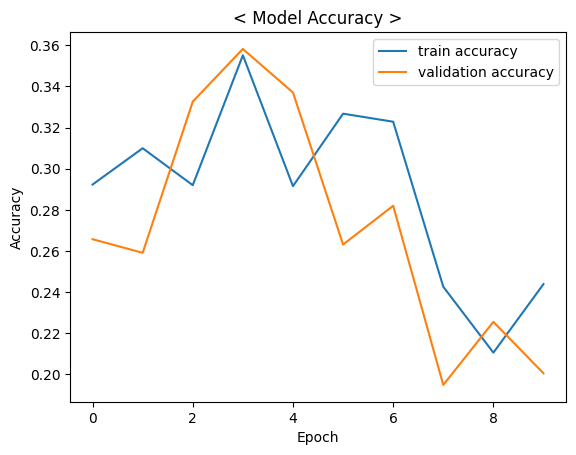

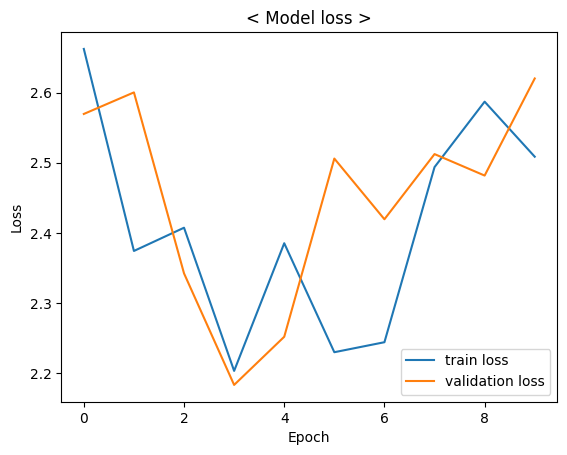

In [13]:
plot_accuracy(history_v3_sgd)
plot_loss(history_v3_sgd)

In [ ]:
from keras.applications import DenseNet161

IMAGE_SIZE = [256,256]

train_samples = 61600
validation_samples = 15386

densenet = DenseNet161(
    include_top=False,
    weights="imagenet",
    input_shape=IMAGE_SIZE + [3]
)


for layer in densenet.layers:
    layer.trainable = False

x = densenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)

prediction = Dense(56, activation='softmax')(x)

model = Model(inputs=densenet.input, outputs=prediction)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy']
)  
checkpointer = ModelCheckpoint(filepath='densenet_sgd.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_densenet_sgd.log')
history_dense = model.fit(
    train_generator,
    batch_size=16,
    epochs=50,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

In [ ]:
model.save('Model_densenet_sgd.keras')

In [ ]:
plot_accuracy(history_dense)
plot_loss(history_dense)

In [ ]:
from keras.applications.resnet50 import ResNet50

resnet = ResNet50(include_top=False, weights="imagenet", input_shape=IMAGE_SIZE + [3])

for layer in resnet.layers:
    layer.trainable = False

x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
x = Dropout(0.2)(x)


prediction = Dense(56, activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

model.compile(
loss='sparse_categorical_crossentropy',
optimizer=sgd,
metrics=['accuracy']
)  
checkpointer = keras.callbacks.ModelCheckpoint(filepath='resnet_sgd.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_resnet_sgd.log')
history_resnet = model.fit(
    train_generator,
    batch_size=16,
    epochs=50,
    steps_per_epoch= train_samples//16,
    validation_data = validation_generator,
    validation_steps = validation_samples//16,
    verbose = 1,
    callbacks=[csv_logger, checkpointer]
    ) 

In [ ]:
model.save('Model_resnet_sgd')

In [ ]:
plot_accuracy(history_resnet)
plot_loss(history_resnet)